In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/[인공지능기초]/analysis/debate/preprocessed_debate_scripts.csv')

In [ ]:
df

,Speaker,Script,no_capital,tokenized_script,filtered_Script,POS_Tagged_Script,lemmatized_Script
0,Kamala Harris,"[Video clip] Together, we will chart a new way...","[video clip] together, we will chart a new way...","['[', 'video', 'clip', ']', 'together', ',', '...","['[', 'video', 'clip', ']', 'together', ',', '...","[('[', 'JJ'), ('video', 'NN'), ('clip', 'NN'),...","[ video clip ] together , chart new way forward ."
1,Donald Trump,[Video clip] We will soon be a great nation ag...,[video clip] we will soon be a great nation ag...,"['[', 'video', 'clip', ']', 'we', 'will', 'soo...","['[', 'video', 'clip', ']', 'soon', 'great', '...","[('[', 'JJ'), ('video', 'NN'), ('clip', 'NN'),...",[ video clip ] soon great nation .
2,Kamala Harris,Kamala Harris. Let's have a good debate.,kamala harris. let's have a good debate.,"['kamala', 'harris', '.', 'let', ""'s"", 'have',...","['kamala', 'harris', '.', 'let', ""'s"", 'good',...","[('kamala', 'NN'), ('harris', 'NN'), ('.', '.'...",kamala harris . let 's good debate .
3,Donald Trump,Nice to see you. Have fun.,nice to see you. have fun.,"['nice', 'to', 'see', 'you', '.', 'have', 'fun...","['nice', 'see', '.', 'fun', '.']","[('nice', 'JJ'), ('see', 'NN'), ('.', '.'), ('...",nice see . fun .
4,Kamala Harris,Thank you.,thank you.,"['thank', 'you', '.']","['thank', '.']","[('thank', 'NN'), ('.', '.')]",thank .
...,...,...,...,...,...,...,...
271,Donald Trump,But I just ask one simple question. Why didn't...,but i just ask one simple question. why didn't...,"['but', 'i', 'just', 'ask', 'one', 'simple', '...","['ask', 'one', 'simple', 'question', '.', ""n't...","[('ask', 'VB'), ('one', 'CD'), ('simple', 'JJ'...",ask one simple question . n't ? 're fail natio...
272,Donald Trump,They don't understand what happened to us as a...,they don't understand what happened to us as a...,"['they', 'do', ""n't"", 'understand', 'what', 'h...","[""n't"", 'understand', 'happened', 'us', 'natio...","[(""n't"", 'RB'), ('understand', 'VB'), ('happen...",n't understand happen u nation . 're leader . ...
273,Donald Trump,I rebuilt our entire military. She gave a lot ...,i rebuilt our entire military. she gave a lot ...,"['i', 'rebuilt', 'our', 'entire', 'military', ...","['rebuilt', 'entire', 'military', '.', 'gave',...","[('rebuilt', 'NN'), ('entire', 'JJ'), ('milita...",rebuilt entire military . give lot away taliba...
274,Kamala Harris,Thank you both.,thank you both.,"['thank', 'you', 'both', '.']","['thank', '.']","[('thank', 'NN'), ('.', '.')]",thank .


In [3]:
lemmatized_df = df.loc[:, ['Speaker', 'lemmatized_Script']]

In [4]:
lemmatized_df

,Speaker,lemmatized_Script
0,Kamala Harris,"[ video clip ] together , chart new way forward ."
1,Donald Trump,[ video clip ] soon great nation .
2,Kamala Harris,kamala harris . let 's good debate .
3,Donald Trump,nice see . fun .
4,Kamala Harris,thank .
...,...,...
271,Donald Trump,ask one simple question . n't ? 're fail natio...
272,Donald Trump,n't understand happen u nation . 're leader . ...
273,Donald Trump,rebuilt entire military . give lot away taliba...
274,Kamala Harris,thank .


In [5]:
# 이름을 인덱스로 지정하기
lemmatized_df.set_index(keys='Speaker')

,lemmatized_Script
Speaker,
Kamala Harris,"[ video clip ] together , chart new way forward ."
Donald Trump,[ video clip ] soon great nation .
Kamala Harris,kamala harris . let 's good debate .
Donald Trump,nice see . fun .
Kamala Harris,thank .
...,...
Donald Trump,ask one simple question . n't ? 're fail natio...
Donald Trump,n't understand happen u nation . 're leader . ...
Donald Trump,rebuilt entire military . give lot away taliba...


In [6]:
print(lemmatized_df.index)

RangeIndex(start=0, stop=276, step=1)


In [7]:
# 해리스와 트럼프 데이터 나누기
trump_corpus = lemmatized_df[lemmatized_df['Speaker'] == 'Donald Trump']['lemmatized_Script']
harris_corpus = lemmatized_df[lemmatized_df['Speaker'] == 'Kamala Harris']['lemmatized_Script']

In [8]:
trump_corpus

,lemmatized_Script
1,[ video clip ] soon great nation .
3,nice see . fun .
5,thank .
11,"first , sale tax . 's incorrect statement . kn..."
12,"fact , never take tariff much money , ca n't ...."
...,...
270,'re go take fossil fuel . 're go thing go make...
271,ask one simple question . n't ? 're fail natio...
272,n't understand happen u nation . 're leader . ...
273,rebuilt entire military . give lot away taliba...


In [9]:
trump_corpus

,lemmatized_Script
1,[ video clip ] soon great nation .
3,nice see . fun .
5,thank .
11,"first , sale tax . 's incorrect statement . kn..."
12,"fact , never take tariff much money , ca n't ...."
...,...
270,'re go take fossil fuel . 're go thing go make...
271,ask one simple question . n't ? 're fail natio...
272,n't understand happen u nation . 're leader . ...
273,rebuilt entire military . give lot away taliba...


#TF-IDF 생성 및 워드 클라우드 출력(Trump)

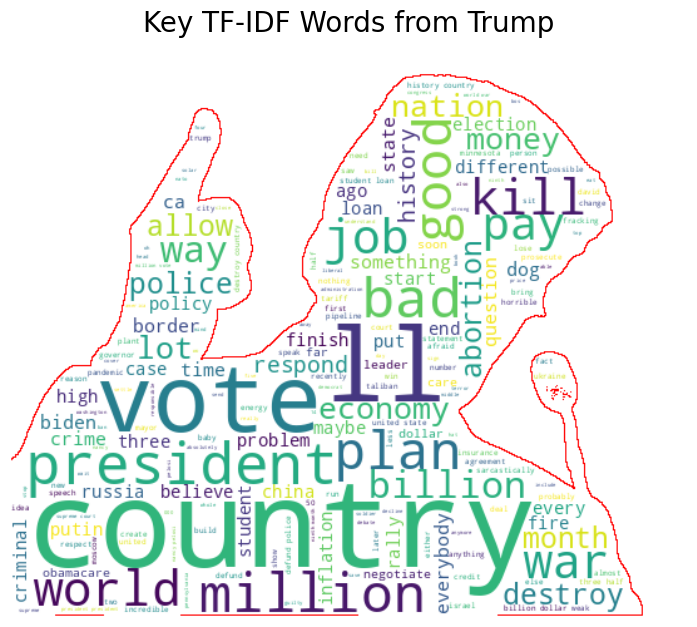

In [20]:

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image, ImageOps, ImageEnhance
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# 사용자 정의 불용어 목록
custom_stop_words = ['television','could','ve','nobody','let','year','even','people','happen', 'back', 'much','another','read','great','ok','see', 'thing','know', 'think', 'ever', 'look', 'want','well',
                     'never','take', 'do', 'many','one', 'would', 'get','say','re','is', 'and', 'the',
                     'to', 'of', 'in', 'that', 'we', 'will', 'a', 'are', 'for', 'it', 'be', 'with',
                     'on', 'as', 'not', 'have', 'this', 'by', 'an', 'or', 'from', 'at', 'but', 'go', 'like'
                     ,'thank', 'talk', 'big', 'right', 'be', 'have', 'do', 'say', 'get', 'make', 'go', 'know', 'take',
                     'come', 'give', 'use', 'find', 'tell', 'ask', 'work', 'seem', 'feel', 'try', 'leave', 'call']

# TF-IDF 벡터라이저 생성
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, min_df=2, max_df=0.5, ngram_range=(1, 3))
tfidf_matrix = vectorizer.fit_transform(trump_corpus)

# 단어와 TF-IDF 스코어 매핑
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray().sum(axis=0)
tfidf_dict = dict(zip(feature_names, tfidf_scores))


# 마스크 이미지 설정 및 전처리
mask_img_path = f"/content/drive/MyDrive/[인공지능기초]/analysis/debate/trump_mask_img.png"
img = Image.open(mask_img_path).convert("L")  # 그레이스케일로 변환
enhancer = ImageEnhance.Brightness(img)
img_enhanced = enhancer.enhance(1.5)
mask = ImageOps.invert(img_enhanced)  # 불투명한 부분을 검은색으로, 투명한 부분을 흰색으로 변환
mask = np.array(mask)  # 배열로 변환

# 후보자에 따라 테두리 색상 설정
contour_color = 'red'

# wordcloud 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    mask=mask,
    contour_width=0.7,
    contour_color=contour_color
).generate_from_frequencies(tfidf_dict)

# wordcloud 시각화
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Key TF-IDF Words from Trump', fontsize=20)
plt.show()


#경제 및 세금:
"money" (돈), "billion" (억), "economy" (경제), "inflation" (인플레이션), "job" (일자리)와 같은 단어는 트럼프가 경제 문제에 집중하고 있음을 나타냅니다. 인플레이션 문제를 해결하고, 정부 지출을 통제하며, 세금 감면을 제안하는 등의 경제 정책이 반영된 것입니다.

#낙태 및 사회 문제:
 "abortion" (낙태)와 "criminal" (범죄)과 같은 단어는 트럼프가 사회적 이슈에 대해 어떤 입장을 취하고 있는지 나타냅니다. 이는 그가 임명한 연방 대법관들이 낙태권을 제한하는 데 핵심적인 역할을 했던 것과 관련이 있습니다.

#이민:
"border" (국경), "kill" (죽이다), "respond" (응답하다)와 같은 단어는 트럼프가 국경 보안에 대한 강경한 입장을 취하고 있음을 나타냅니다. 이는 불법 이민을 통제하고 국경에 장벽을 건설하려는 트럼프의 공약과 일치합니다.

#자국우선주의
'country'는 국가를 의미하며, 트럼프 전 대통령의 연설에서 미국의 주권, 애국심, 국가적 정체성 등을 강조하는 맥락에서 자주 사용되었을 것으로 보입니다. 이는 그의 '미국 우선주의' 정책과 일치하며, 국가의 이익을 최우선으로 하겠다는 의지를 나타냅니다.

#TF-IDF 생성 및 워드 클라우드 출력(Harris)

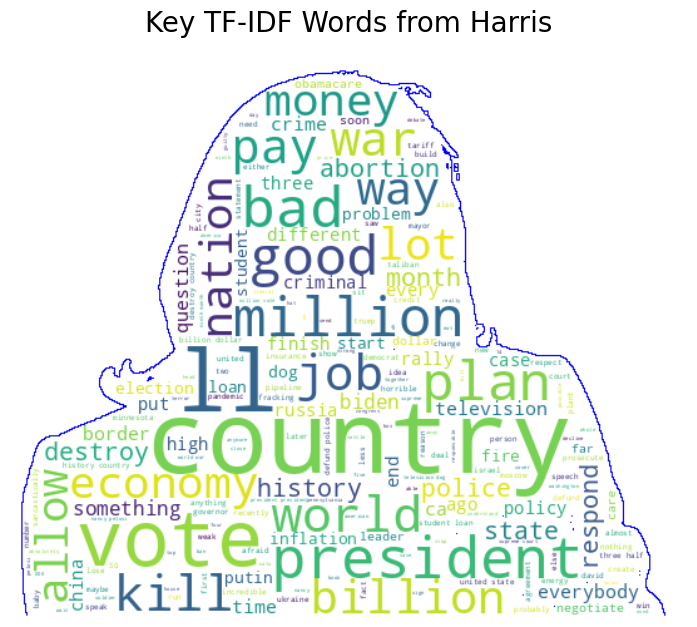

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 사용자 정의 불용어 목록
custom_stop_words = ['actually','donald','include', 'tonight','bring', 'someone','believe','could','ve','nobody','let','year','even','people','happen', 'back', 'much','another','read','great','ok','see', 'thing','know', 'think', 'ever', 'look', 'want','well',
                     'never','take', 'do', 'many','one', 'would', 'get','say','re','is', 'and', 'the',
                     'to', 'of', 'in', 'that', 'we', 'will', 'a', 'are', 'for', 'it', 'be', 'with',
                     'on', 'as', 'not', 'have', 'this', 'by', 'an', 'or', 'from', 'at', 'but', 'go', 'like'
                     ,'thank', 'talk', 'big', 'right', 'be', 'have', 'do', 'say', 'get', 'make', 'go', 'know', 'take',
                     'come', 'give', 'use', 'find', 'tell', 'ask', 'work', 'seem', 'feel', 'try', 'leave', 'call']

# TF-IDF 벡터라이저 생성
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, min_df=2, max_df=0.5, ngram_range=(1, 3))
tfidf_matrix = vectorizer.fit_transform(trump_corpus)

# 단어와 TF-IDF 스코어 매핑
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray().sum(axis=0)
tfidf_dict = dict(zip(feature_names, tfidf_scores))


# 마스크 이미지 설정 및 전처리
mask_img_path = f"/content/drive/MyDrive/[인공지능기초]/analysis/debate/harris_mask_img.png"
img = Image.open(mask_img_path).convert("L")  # 그레이스케일로 변환
enhancer = ImageEnhance.Brightness(img)
img_enhanced = enhancer.enhance(1.5)
mask = ImageOps.invert(img_enhanced)  # 불투명한 부분을 검은색으로, 투명한 부분을 흰색으로 변환
mask = np.array(mask)  # 배열로 변환

# 후보자에 따라 테두리 색상 설정
contour_color = 'blue'

# wordcloud 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    mask=mask,
    contour_width=0.7,
    contour_color=contour_color
).generate_from_frequencies(tfidf_dict)

# wordcloud 시각화
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Key TF-IDF Words from Harris', fontsize=20)
plt.show()


해리스 관련 정책 분석

# LDA - 트럼프

In [22]:
from sklearn.decomposition import LatentDirichletAllocation

In [25]:
import pandas as pd
from gensim import corpora, models
from gensim.utils import simple_preprocess


# 사용자 정의 불용어 목록
custom_stop_words = ['actually','donald','include', 'tonight','bring', 'someone','believe','could','ve','nobody','let','year','even','people','happen', 'back', 'much','another','read','great','ok','see', 'thing','know', 'think', 'ever', 'look', 'want','well',
                     'never','take', 'do', 'many','one', 'would', 'get','say','re','is', 'and', 'the',
                     'to', 'of', 'in', 'that', 'we', 'will', 'a', 'are', 'for', 'it', 'be', 'with',
                     'on', 'as', 'not', 'have', 'this', 'by', 'an', 'or', 'from', 'at', 'but', 'go', 'like'
                     ,'thank', 'talk', 'big', 'right', 'be', 'have', 'do', 'say', 'get', 'make', 'go', 'know', 'take',
                     'come', 'give', 'use', 'find', 'tell', 'ask', 'work', 'seem', 'feel', 'try', 'leave', 'call']

# 텍스트 데이터를 문서 목록으로 변환, 불용어 제거
texts = [[word for word in simple_preprocess(doc) if word not in custom_stop_words]
         for doc in trump_corpus]


# # 텍스트 데이터를 문서 목록으로 변환
# texts = [simple_preprocess(doc) for doc in trump_corpus]

# 사전 생성
dictionary = corpora.Dictionary(texts)

# 코퍼스 생성 (각 문서를 (단어 ID, 빈도수)의 리스트로 변환)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 훈련
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# 각 주제와 그 주제를 구성하는 단어들을 출력
topics = lda_model.print_topics(num_words=5)

for topic in topics:
    print(topic)

(0, '0.022*"billion" + 0.019*"bad" + 0.014*"biden" + 0.013*"pay" + 0.013*"country"')
(1, '0.021*"month" + 0.014*"fire" + 0.012*"good" + 0.012*"job" + 0.012*"case"')
(2, '0.056*"country" + 0.020*"vote" + 0.016*"world" + 0.014*"bad" + 0.012*"nation"')
(3, '0.031*"president" + 0.027*"ll" + 0.015*"war" + 0.012*"election" + 0.010*"plan"')
(4, '0.022*"country" + 0.017*"million" + 0.013*"everybody" + 0.013*"kill" + 0.011*"state"')


#LDA - 해리스

In [24]:

# 사용자 정의 불용어 목록
custom_stop_words = ['actually','donald','include', 'tonight','bring', 'someone','believe','could','ve','nobody','let','year','even','people','happen', 'back', 'much','another','read','great','ok','see', 'thing','know', 'think', 'ever', 'look', 'want','well',
                     'never','take', 'do', 'many','one', 'would', 'get','say','re','is', 'and', 'the',
                     'to', 'of', 'in', 'that', 'we', 'will', 'a', 'are', 'for', 'it', 'be', 'with',
                     'on', 'as', 'not', 'have', 'this', 'by', 'an', 'or', 'from', 'at', 'but', 'go', 'like'
                     ,'thank', 'talk', 'big', 'right', 'be', 'have', 'do', 'say', 'get', 'make', 'go', 'know', 'take',
                     'come', 'give', 'use', 'find', 'tell', 'ask', 'work', 'seem', 'feel', 'try', 'leave', 'call']

# 텍스트 데이터를 문서 목록으로 변환, 불용어 제거
texts = [[word for word in simple_preprocess(doc) if word not in custom_stop_words]
         for doc in harris_corpus]
# 사전 생성
dictionary = corpora.Dictionary(texts)

# 코퍼스 생성 (각 문서를 (단어 ID, 빈도수)의 리스트로 변환)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 훈련
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# 각 주제와 그 주제를 구성하는 단어들을 출력
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.023*"president" + 0.023*"american" + 0.019*"trump" + 0.018*"plan" + 0.010*"state"')
(1, '0.021*"trump" + 0.021*"plan" + 0.018*"care" + 0.014*"tax" + 0.012*"act"')
(2, '0.030*"president" + 0.020*"state" + 0.015*"america" + 0.015*"understand" + 0.014*"united"')
(3, '0.014*"stand" + 0.011*"end" + 0.009*"president" + 0.009*"business" + 0.008*"former"')
(4, '0.019*"time" + 0.017*"president" + 0.015*"american" + 0.011*"address" + 0.009*"need"')


# 발언수

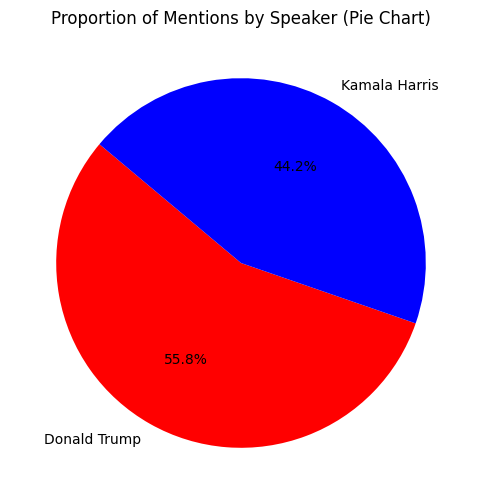

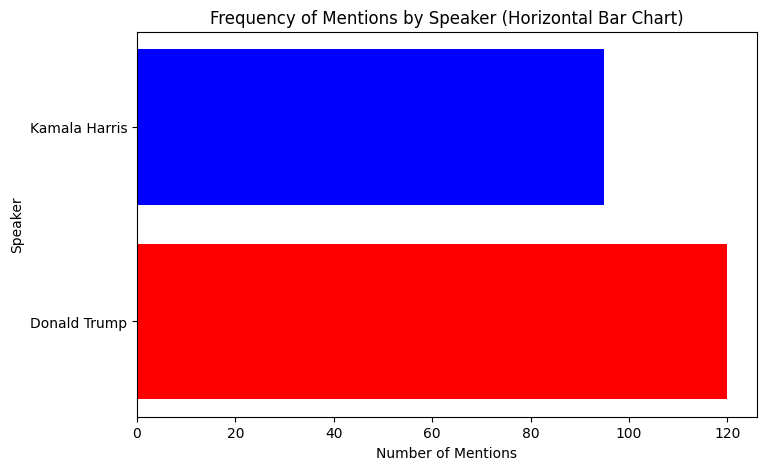

In [29]:
import matplotlib.pyplot as plt

# Example frequency counts for visualization
# Replace these with actual values from your lemmatized_df calculation
trump_mentions = 120  # Example data
harris_mentions = 95   # Example data

# Labels and values for the speakers
speakers = ['Donald Trump', 'Kamala Harris']
frequencies = [trump_mentions, harris_mentions]

# Colors for each speaker
colors = ['red', 'blue']

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(frequencies, labels=speakers, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Mentions by Speaker (Pie Chart)')
plt.show()

# Horizontal Bar Chart
plt.figure(figsize=(8, 5))
plt.barh(speakers, frequencies, color=colors)
plt.title('Frequency of Mentions by Speaker (Horizontal Bar Chart)')
plt.xlabel('Number of Mentions')
plt.ylabel('Speaker')
plt.show()
